In [ ]:
# notebook configuration
%matplotlib inline

import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from IPython.display import Image
#import pandas as pd


# define general parameters for plots
plt.rcParams["figure.figsize"] = (12.0, 9.0)


In [ ]:
def Reynolds(rho, vr, dp, mu):
    Re = rho*vr*dp/mu
    
    return Re

def Prandlt(cp, mu, k):
    Pr = cp*mu/k
    
    return Pr

def Grashof(L, rho, mu, Tw, Tinf):
    Tfilm = (Tw+Tinf)/2
    beta = 1/Tfilm
    Gr = (L*L*L*9.81*beta*(Tw-Tinf)*rho*rho)/(mu*mu)
        
    return Gr

def Rayleight(Gr, Pr):
    Ra = Gr*Pr
        
    return Ra

def NusseltGunn(Re, Pr, alpha_f):

    Nu = (7.0 - 10.0 * alpha_f + 5.0 * alpha_f * alpha_f) * (1.0 + 0.7 * np.power(Re, 0.2) * np.power(Pr, 0.3333333333)) + \
    (1.33 - 2.4 * alpha_f + 1.2 * alpha_f * alpha_f) * np.power(Re, 0.7) * np.power(Pr, 0.3333333333)

    return Nu

def h_average(Nu, dp, k):
    h = Nu*k/dp
    
    return h

def Biot(dp, h, ks):
    Bi = dp*h/ks
    
    return Bi

In [ ]:
# loading the digitized data

case1 = open("netl-case1-standard-aveTemp.csv", 'r')
time_case1, temp_case1 = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()

case1 = open("netl-case1-standard-minTemp.csv", 'r')
time_case1, temp_min_case1 = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()

case1 = open("netl-case1-improved-aveTemp.csv", 'r')
time_case1i, temp_case1i = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()

case1 = open("netl-case1-improved-minTemp.csv", 'r')
time_case1i, temp_min_case1i = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()

case1 = open("case1_standard_deviation_standard.csv", 'r')
time_case1, sd_case1 = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()

case1 = open("case1_standard_deviation_improved.csv", 'r')
time_case1i, sd_case1i = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()


case1 = open("NETL-case1-alpha12-standard-ratio4-particle-data", 'r')
particle_temp_case1 = np.loadtxt(case1, delimiter = ',', skiprows = 2, unpack = True)    
case1.close()

case1 = open("NETL-case1-alpha12-improved-ratio4-particle-data", 'r')
particle_temp_case1i = np.loadtxt(case1, delimiter = ',', skiprows = 2, unpack = True)    
case1.close()


In [ ]:
#properties
particle_diameter = 3.256/1000 #m
particle_density = 1131 #kg/m3
particle_thermal_conductivity = 0.25 #W/mK
particle_higher_thermal_conductivity = particle_thermal_conductivity/5.0 #W/mK
print("Smaller Thermal_conductivity = ",particle_higher_thermal_conductivity)
particle_specific_heat  = 1600 #J/kg K
particle_poisson_ratio = 0.4 #

gas_density = 1.2041 #kg/m3
gas_viscosity = 1.90/100000 #pa.s
gas_specific_heat = 1000 #J/kg K
gas_thermal_conductivity = 0.024 #W/ mK

case1_final_velocity = 2.179 #m/s
case2_final_velocity = 3.28 #m/s
case3_final_velocity = 4.358 #m/s

alpha_f = 1 - 0.39

#case1
case1_Re = Reynolds(gas_density, case1_final_velocity, particle_diameter, gas_viscosity)
print("case1_Re = ", case1_Re)
case1_Pr = Prandlt(gas_specific_heat, gas_viscosity, gas_thermal_conductivity)
print("case1_Pr = ", case1_Pr)
Nusselt_case1 = NusseltGunn(case1_Re, case1_Pr, alpha_f)
print("Nusselt_case1 = ", Nusselt_case1)
h_case1 = h_average(Nusselt_case1, particle_diameter, gas_thermal_conductivity)
print("h_case1 = ", h_case1)
Biot_case1 = Biot(particle_diameter, h_case1, particle_thermal_conductivity)
print("Biot_case1 = ", Biot_case1,  "\n")

#case2
case2_Re = Reynolds(gas_density, case2_final_velocity, particle_diameter, gas_viscosity)
print("case1_Re = ", case2_Re)
case2_Pr = Prandlt(gas_specific_heat, gas_viscosity, gas_thermal_conductivity)
print("case1_Pr = ", case2_Pr)
Nusselt_case2 = NusseltGunn(case2_Re, case2_Pr, alpha_f)
print("Nusselt_case1 = ", Nusselt_case2)
h_case2 = h_average(Nusselt_case2, particle_diameter, gas_thermal_conductivity)
print("h_case1 = ", h_case2)
Biot_case2 = Biot(particle_diameter, h_case2, particle_thermal_conductivity)
print("Biot_case1 = ", Biot_case2,  "\n")

#case3
case3_Re = Reynolds(gas_density, case3_final_velocity, particle_diameter, gas_viscosity)
print("case1_Re = ", case3_Re)
case3_Pr = Prandlt(gas_specific_heat, gas_viscosity, gas_thermal_conductivity)
print("case1_Pr = ", case3_Pr)
Nusselt_case3 = NusseltGunn(case3_Re, case3_Pr, alpha_f)
print("Nusselt_case1 = ", Nusselt_case3)
h_case3 = h_average(Nusselt_case3, particle_diameter, gas_thermal_conductivity)
print("h_case1 = ", h_case3)
Biot_case3 = Biot(particle_diameter, h_case3, particle_thermal_conductivity)
print("Biot_case3 = ", Biot_case3, "\n")

#case1b
case1b_Re = Reynolds(gas_density, case1_final_velocity, particle_diameter, gas_viscosity)
print("case1b_Re = ", case1b_Re)
case1b_Pr = Prandlt(gas_specific_heat, gas_viscosity, gas_thermal_conductivity)
print("case1b_Pr = ", case1b_Pr)
Nusselt_case1b = NusseltGunn(case1b_Re, case1b_Pr, alpha_f)
print("Nusselt_case1b = ", Nusselt_case1b)
h_case1b = h_average(Nusselt_case1b, particle_diameter, gas_thermal_conductivity)
print("h_case1b = ", h_case1b)

Biot_case1b = Biot(particle_diameter, h_case1b, particle_higher_thermal_conductivity)
print("Biot_case1b = ", Biot_case1b)

In [ ]:

plt.plot(time_case1,  temp_case1-273.15, linestyle = "-", color = "black", marker = 'None', linewidth = 2,label = "Standard")
plt.plot(time_case1i,  temp_case1i-273.15, linestyle = "--", color = "black", marker = 'None', linewidth = 2,label = "Improved")

#plt.title("Vertical velocity ", fontsize = 16)
plt.xlabel("time [s]", fontsize = 20)
#plt.ylabel("$ (T_{bed}-T_{f}^0)/(T_{bed}^0-T_{f}^0)$ [ ] ", fontsize = 20)
plt.ylabel(" Mean Particles Temperature [\u00B0C] ", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.xlim(0, 5)     
plt.ylim(46, 50) 
plt.savefig("average_bed_temperature.png")
plt.show()

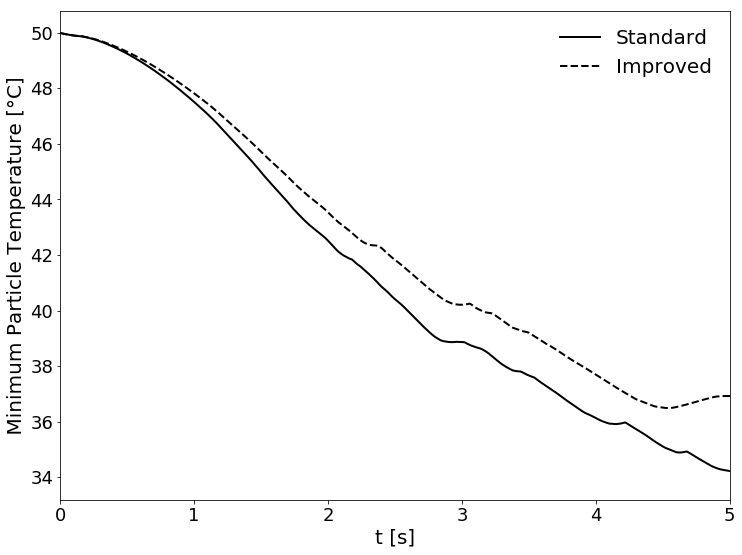

In [6]:
plt.plot(time_case1,  temp_min_case1-273.15,  linestyle = "-", color = "black", marker = 'None', linewidth = 2,label = "Standard")
plt.plot(time_case1i,  temp_min_case1i-273.15,  linestyle = "--", color = "black", marker = 'None', linewidth = 2,label = "Improved")

#plt.title("Vertical velocity ", fontsize = 16)
plt.xlabel("t [s]", fontsize = 20)
#plt.ylabel("$ (T_{bed}-T_{f}^0)/(T_{bed}^0-T_{f}^0)$ [ ] ", fontsize = 20)
plt.ylabel(" Minimum Particle Temperature [\u00B0C] ", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.xlim(0, 5)     
#plt.ylim(300, 323.15) 
plt.savefig("min_bed_temperature.png")
plt.show()

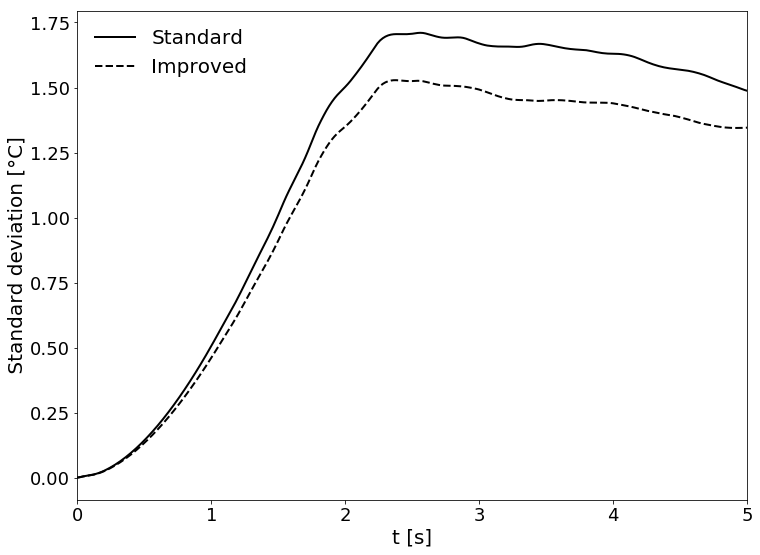

In [7]:
plt.plot(time_case1,  sd_case1,  linestyle = "-", color = "black", marker = 'None', linewidth = 2,label = "Standard")
plt.plot(time_case1i,  sd_case1i,  linestyle = "--", color = "black", marker = 'None', linewidth = 2,label = "Improved")

#plt.title("Vertical velocity ", fontsize = 16)
plt.xlabel("t [s]", fontsize = 20)
#plt.ylabel("$ (T_{bed}-T_{f}^0)/(T_{bed}^0-T_{f}^0)$ [ ] ", fontsize = 20)
plt.ylabel(" Standard deviation [\u00B0C] ", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.xlim(0, 5)     
#plt.ylim(300, 323.15) 
plt.savefig("min_bed_temperature.png")
plt.show()

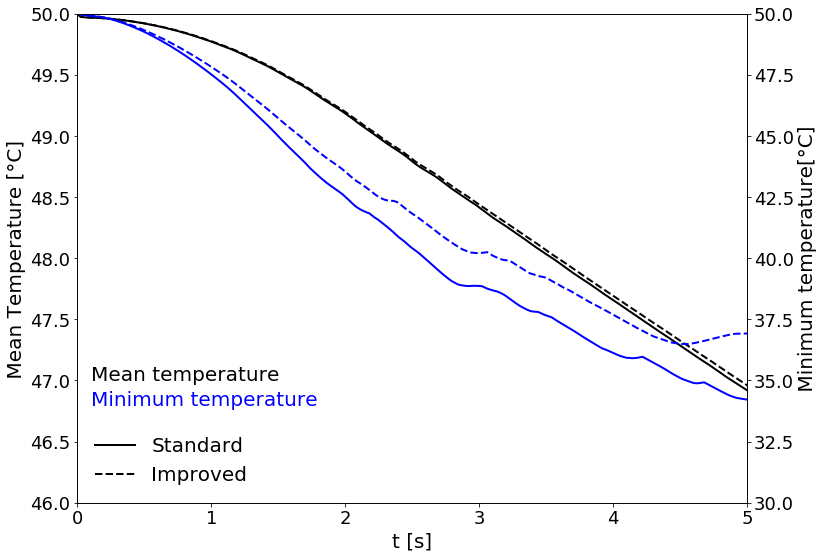

In [27]:
fig, ax1 = plt.subplots()
ax1.plot(time_case1,  temp_case1-273.15, linestyle = "-", color = "black", marker = 'None', linewidth = 2,label = "Standard")
ax1.plot(time_case1i,  temp_case1i-273.15, linestyle = "--", color = "black", marker = 'None', linewidth = 2,label = "Improved")

ax1.set_xlabel("t [s]", fontsize = 20)
ax1.set_ylabel(" Mean Temperature [\u00B0C] ", fontsize = 20)
plt.ylim(46, 50) 
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 3)

ax2 = ax1.twinx()
ax2.plot(time_case1,  temp_min_case1-273.15, linestyle = "-", color = "blue", marker = 'None', linewidth = 2)
ax2.plot(time_case1i,  temp_min_case1i-273.15, linestyle = "--", color = "blue", marker = 'None', linewidth = 2)
ax2.set_ylabel(" Minimum temperature[\u00B0C] ", fontsize = 20)
#ax2.tick_params('y')
plt.ylim(30, 50) 
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)


plt.xlim(0, 5)     

#fig.tight_layout()
plt.savefig("bed_temperature.png")
plt.annotate('Mean temperature', color = "black",xy=(0.1, 35), fontsize=20)
plt.annotate('Minimum temperature', color = "blue", xy=(0.1, 34), fontsize=20)
#plt.annotate('\u2013. Stand. deviation ', color = "black", xy=(0.1, 0.8), fontsize=20)

plt.show()


315.846


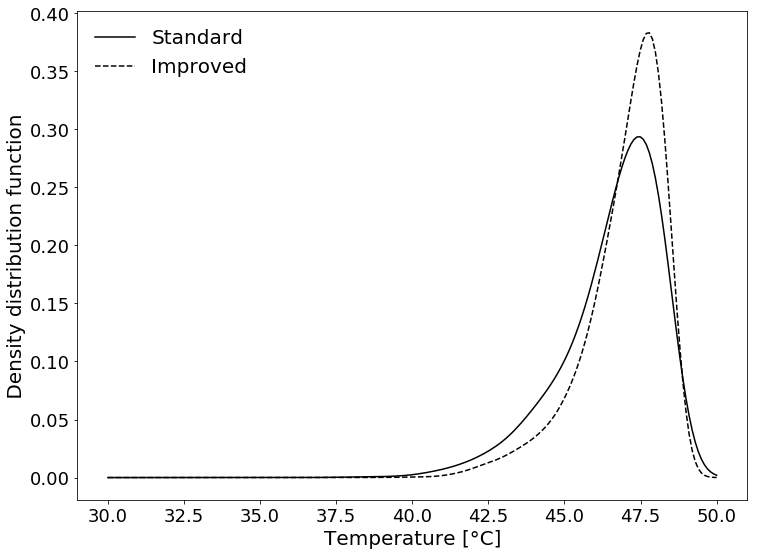

In [28]:
print(particle_temp_case1[0])
# library & dataset
#import seaborn as sns


#sns.kdeplot(particle_temp_case1, shade=False);
#sns.kdeplot(particle_temp_case1, bw=1, label="bw: 1")
#plt.show()
from scipy.stats import gaussian_kde
xs = np.linspace(30,50,200)
densityStandard = gaussian_kde(particle_temp_case1-273.15)
densityStandard.covariance_factor = lambda : .25
densityStandard._compute_covariance()

densityImproved = gaussian_kde(particle_temp_case1i-273.15)
densityImproved.covariance_factor = lambda : .25
densityImproved._compute_covariance()


plt.plot(xs,densityStandard(xs),  linestyle = "-", color = "black", label = "Standard")
plt.plot(xs,densityImproved(xs),   linestyle = "--", color = "black", label = "Improved")
plt.xlabel("Temperature [\u00B0C]", fontsize = 20)
#plt.ylabel("$ (T_{bed}-T_{f}^0)/(T_{bed}^0-T_{f}^0)$ [ ] ", fontsize = 20)
plt.ylabel(" Density distribution function ", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.savefig("density_distribution5s.png")
plt.show()